# Kaggle Notebook

**Content:**
- [Introduction to Machine Learning](#1)
    - [EDA (Exploratory Data Analysis)](#2)
    - [K-Nearest Neighbors (KNN)](#3)
    - [Regression](#4)
    - [Random Forest](#5)
    - [Model Evaluation](#6)

  
  

<a id="1"></a> <br>
### INTRODUCTION TO MACHINE LEARNING

This is a simple demo of Machine Learning codes for Malaysia ML Study Jam. This notebook is adopted from [here](https://www.kaggle.com/code/kanncaa1/machine-learning-tutorial-for-beginners/notebook).

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

biomechanical



In [2]:
# read csv (comma separated value) into data
data = pd.read_csv('../input/biomechanical/column_2C.csv')
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['classic', 'seaborn-poster', 'dark_background', 'seaborn-ticks', 'seaborn-muted', 'seaborn-deep', 'fivethirtyeight', 'grayscale', 'seaborn-notebook', 'ggplot', 'bmh', 'seaborn-paper', 'fast', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-pastel', 'seaborn', 'seaborn-talk', 'seaborn-white', 'seaborn-dark', 'seaborn-whitegrid', 'seaborn-dark-palette', 'Solarize_Light2', '_classic_test', 'seaborn-darkgrid']


<a id="2"></a> <br>
### EXPLORATORY DATA ANALYSIS (EDA)
* In order to make something in data, we will explore the data. 
* Always start with *head()* to see features that are *pelvic_incidence,	pelvic_tilt numeric,	lumbar_lordosis_angle,	sacral_slope,	pelvic_radius* and 	*degree_spondylolisthesis* and target variable that is *class*
* head(): default value of it shows first 5 rows(samples). If you want to see for example 100 rows just write head(100)


In [3]:
# to see features and target variable
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
# Well know question is is there any NaN value and length of this data so lets look at info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


As you can see:
* length: 310 (range index)
* Features are float
* Target variables are object that is like string
* Now we have some ideas about data but lets look go inside data deeper
    * Why we need to see statistics like mean, std, max or min? Answer: In order to visualize data, values should be closer each other. As you can see values looks like closer. At least there is no incompatible values like mean of one feature is 0.1 and other is 1000. For some machine learning models, you may need to scale and normalise the data.

In [5]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


pd.plotting.scatter_matrix:
* green: *normal* and red: *abnormal*
* c:  color
* figsize: figure size
* diagonal: histohram of each features
* alpha: opacity
* s: size of marker
* marker: marker type 

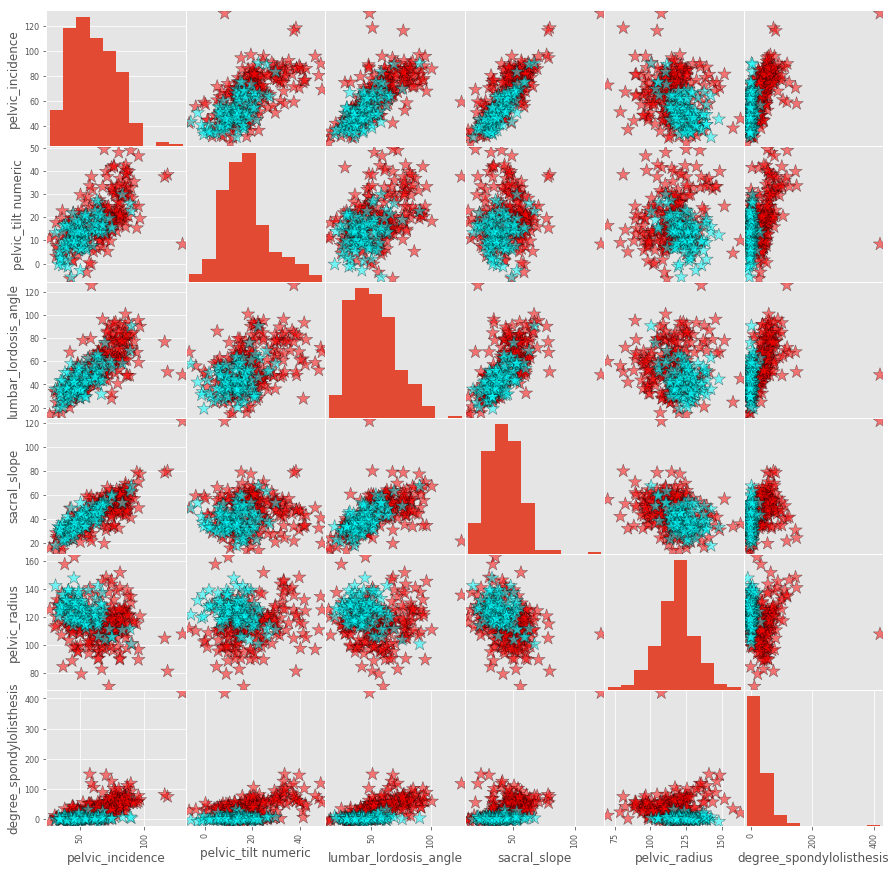

In [6]:
color_list = ['red' if i=='Abnormal' else 'Cyan' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()


Okay, as you understand in scatter matrix there are relations between each feature but how many *normal(green)* and *abnormal(red)* classes are there. 
* Searborn library has *countplot()* that counts number of classes
* Also you can print it with *value_counts()* method

<br> This data looks like balanced. Actually there is no definiton or numeric value of balanced data but this data is balanced enough for us.
<br> Now lets learn first classification method KNN

Abnormal    210
Normal      100
Name: class, dtype: int64

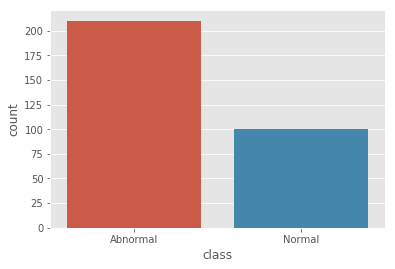

In [7]:
sns.countplot(x="class", data=data)
data.loc[:,'class'].value_counts()

<a id="3"></a> <br>
###  K-NEAREST NEIGHBORS (KNN)
* KNN: Look at the K closest labeled data points
* Classification method.
* First we need to train our data. Train = fit
* fit(): fits the data, train the data.
* predict(): predicts the data
<br> If you do not understand what is KNN, look at youtube there are videos like 4-5 minutes. You can understand better with it.
<br> Lets learn how to implement it with sklearn
* x: features
* y: target variables(normal, abnormal)
* n_neighbors: K. In this example it is 3. it means that Look at the 3 closest labeled data points


In [8]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

* Well, we fit the data and predict it with KNN. 
* So, do we predict correct or what is our accuracy or the accuracy is best metric to evaluate our result? Lets give answer of this questions
<br> Measuring model performance:
* Accuracy which is fraction of correct predictions is commonly used metric. We will use it know but there is another problem

<br>As you see I train data with x (features) and again predict the x(features). Yes you are reading right but yes you are right again it is absurd :)

<br>Therefore we need to split our data train and test sets.
* train: use train set by fitting
* test: make prediction on test set.
* With train and test sets, fitted data and tested data are completely different
* train_test_split(x,y,test_size = 0.3,random_state = 1)
    * x: features
    * y: target variables (normal,abnormal)
    * test_size: percentage of test size. Example test_size = 0.3, test size = 30% and train size = 70%
    * random_state: sets a seed. If this seed is same number, train_test_split() produce exact same split at each time
* fit(x_train,y_train): fit on train sets
* score(x_test,y_test)): predict and give accuracy on test sets

### Training, Validation, Testing Dataset

![train-test](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgLv631haYO6IDGY5NkE0HuWBsZGYaxzktvtgPkc524iyIwdL68hMKtiHLbbw-syezxaXXRln7LK1FB0S0uMsQxvoC_izakx5JloLlNHeTaHBXxx9J_MNFKKDpqcV_9GqhfdzXlsPLm7OgbjD1ThTYYcWYz01O3AhKo_spqobTmlGTZcJSMNrc6Rv20/s1600/Untitled.pn)

In [9]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8602150537634409


Accuracy is 86% so is it good ? We need to find out more or perform model evaluations.
<br> Now the question is why we choose K = 3 or what value we need to choose K. The answer is in model complexity

<br> Model complexity:
* K has general name. It is called a hyperparameter. For now just know K is hyperparameter and we need to choose it that gives best performace. 
* Literature says if k is small, model is complex model can lead to overfit. It means that model memorizes the train sets and cannot predict test set with good accuracy.
* If k is big, model that is less complex model can lead to underfit. 
* At below, I range K value from 1 to 25(exclude) and find accuracy for each K value. As you can see in plot, when K is 1 it memozize train sets and cannot give good accuracy on test set (overfit). Also if K is 18, model is lead to underfit. Again accuracy is not enough. However look at when K is 18(best performance), accuracy has highest value almost 88%. 



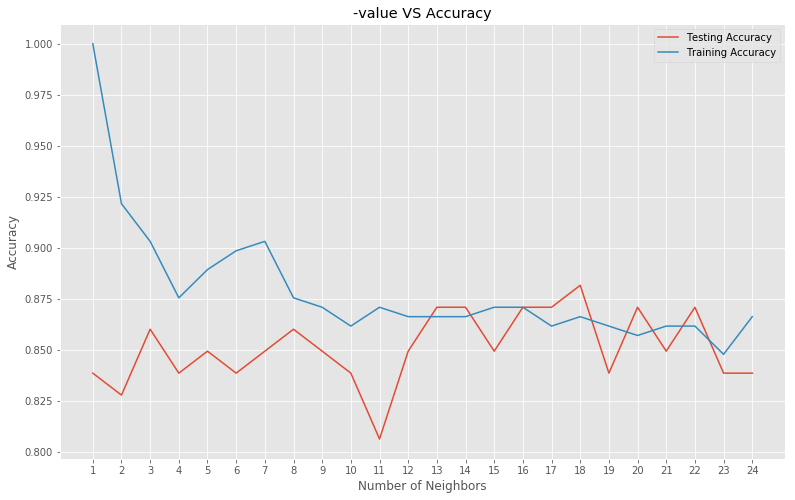

Best accuracy is 0.8817204301075269 with K = 18


In [10]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

### Up to this point what you learn:
* Supervised learning
* Exploratory data analysis
* KNN
    * How to split data
    * How to fit, predict data
    * How to measure medel performance (accuracy)
    * How to choose hyperparameter (K)
    
**<br> What happens if I chance the title KNN and make it some other classification technique like Random Forest?**
* The answer is **nothing**. What you need to is just watch a video about what is random forest in youtube and implement what you learn in KNN. Because the idea and even most of the codes (only KNeighborsClassifier need to be RandomForestClassifier ) are same. You need to split, fit, predict your data and measue performance and choose hyperparameter of random forest(like max_depth). 

<a id="4"></a> <br>
### REGRESSION
* Supervised learning
* We will learn linear regression
* This orthopedic patients data is not proper for regression so we will only use two features that are *sacral_slope* and *pelvic_incidence* of abnormal 
    * Consider only feature is pelvic_incidence and target is sacral_slope 
    * Lets look at scatter plot so as to understand it better
    * reshape(-1,1): If you do not use it shape of x or y becaomes (210,) and we cannot use it in sklearn, so we use shape(-1,1) and shape of x or y be (210, 1). 

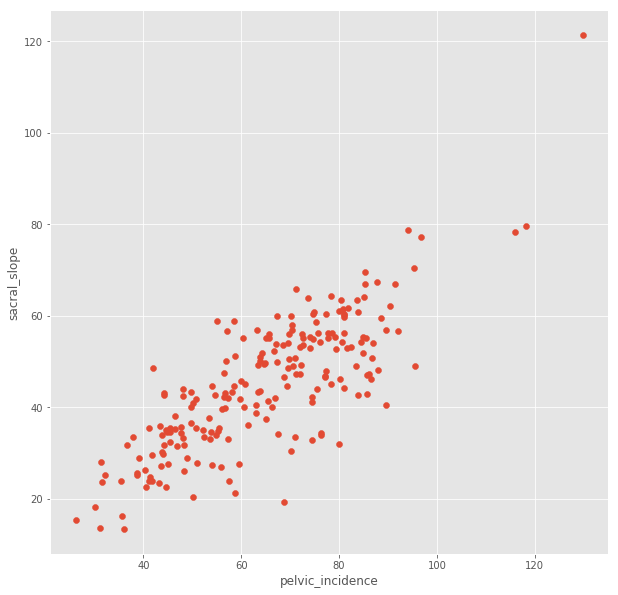

In [11]:
# create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

Now we have our data to make regression. In regression problems target value is continuously varying variable such as price of house or sacral_slope. Lets fit line into this points.

<br> Linear regression
* y = ax + b       where  y = target, x = feature and a = parameter of model
* We choose parameter of model(a) according to minimum error function that is lost function
* In linear regression we use Ordinary Least Square (OLS) as lost function.
* OLS: sum all residuals but some positive and negative residuals can cancel each other so we sum of square of residuals. It is called OLS
* Score: Score uses R^2 method that is ((y_pred - y_mean)^2 )/(y_actual - y_mean)^2

R^2 score:  0.6458410481075871


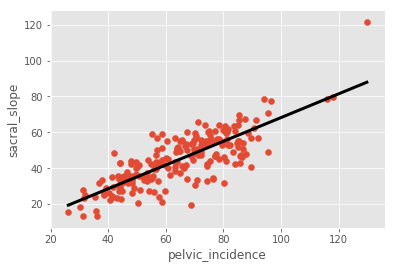

In [12]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

<a id="5"></a> <br>
### RANDOM FOREST

In [13]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[58  8]
 [ 7 20]]
Classification report: 
              precision    recall  f1-score   support

   Abnormal       0.89      0.88      0.89        66
     Normal       0.71      0.74      0.73        27

avg / total       0.84      0.84      0.84        93



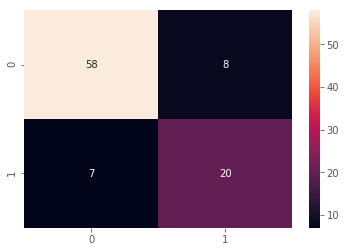

In [14]:
# visualize with seaborn library
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

<a id="6"></a> <br>
### MODEL EVALUATION
Now lets discuss accuracy. Is it enough for measurement of model selection. For example, there is a data that includes 95% normal and 5% abnormal samples and our model uses accuracy for measurement metric. Then our model predict 100% normal for all samples and accuracy is 95% but it classify all abnormal samples wrong. Therefore we need to use confusion matrix as a model measurement matris in imbalance data.
While using confusion matrix lets use Random forest classifier to diversify classification methods.

![confusion_matrix](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEipcXJkfwq-zXlQ14SKgEUkfiy1kktjpnGnMP9SjbSXJA1Qu21IV04dYJDeA5zbjqIsLIbbPrP_6fGdXJh-SMFx2ktCxz1vlC_Pa3WaAFjcSrexYVRn1_Cgn3CX2oFcwJ3VmfiKZt37f7ajiVD3qPIdKmakwkn2vGJImv_kM4O1DbbOmvXZ9b1JI4br/s600/cm.png)

- tp = true positive (20), fp = false positive (7), fn = false negative (8), tn = true negative (58)
- tp = Prediction is positive (normal) and actual is positive (normal).
- fp = Prediction is positive (normal) and actual is negative (abnormal).
- fn = Prediction is negative (abnormal) and actual is positive (normal).
- tn = Prediction is negative (abnormal) and actual is negative (abnormal)
- precision = tp / (tp+fp)
- recall = tp / (tp+fn)
- f1 = 2 precision recall / ( precision + recall)

# CONCLUSION
This is the end of the ML Study Jam demo. Please go through the material in [Kaggle Learn](http://www.kaggle.com/learn) to learn more.